# Feature Engineering:
Feature engineering is the process of using practical, statistical, and data science knowledge to select, transform, or extract characteristics, properties, and attributes from raw data.

In [1]:
# Imports
# Packages for numerics + dataframes
import pandas as pd
import numpy as np
import math
# Packages for visualizationa
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions for calculating trip durations
from datetime import datetime
from datetime import date
from datetime import timedelta

In [2]:
df=pd.read_csv(r"C:\Users\yorgh\Documents\Course Materials\Google Advanced Data Analytics Course\Datasets Exercise\Automatidata project\2017_Yellow_Taxi_Trip_CleanData.csv")
df

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,13.8
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,16.8
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,7.3
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,21.3
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21917,67858616,2,2017-08-10 22:20:04,2017-08-10 22:29:31,1,0.89,1,N,229,170,1,7.5,0.5,0.5,1.76,0.0,0.3,8.8
21918,14873857,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.0,0.3,5.8
21919,74239933,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.0,0.3,5.3
21920,60217333,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.0,0.3,11.3


In [3]:
# Checking for missing data and duplicates using .isna() and .drop_duplicates()
### YOUR CODE HERE ###

# Check for duplicates
print('Shape of dataframe:', df.shape)
print('Shape of dataframe with duplicates dropped:', df.drop_duplicates().shape)

# Check for missing values in dataframe
print('Total count of missing values:', df.isna().sum().sum())

# Display missing values per column in dataframe
print('Missing values per column:')
df.isna().sum()

Shape of dataframe: (21922, 18)
Shape of dataframe with duplicates dropped: (21922, 18)
Total count of missing values: 0
Missing values per column:


Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [4]:
# Display descriptive stats about the data
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.192200e+04,21922.000000,21922.000000,21922.000000,21922.0,21922.000000,21922.000000,21922.000000,21922.000000,21922.000000,21922.000000,21922.000000,21922.000000,21922.000000,21922.000000
mean,5.675393e+07,1.558526,1.643372,2.555592,1.0,162.734376,161.787246,1.323830,11.823511,0.322097,0.499863,1.680368,0.186587,0.299945,12.950794
std,3.274305e+07,0.496574,1.288570,2.763908,0.0,66.879626,70.042889,0.467947,8.327256,0.371611,0.008271,2.003999,1.024419,0.004052,8.343011
min,1.212700e+04,1.000000,0.000000,0.000000,1.0,4.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.854718e+07,1.000000,1.000000,0.980000,1.0,113.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,7.800000
50%,5.676933e+07,2.000000,1.000000,1.600000,1.0,162.000000,162.000000,1.000000,9.000000,0.000000,0.500000,1.350000,0.000000,0.300000,10.300000
75%,8.534490e+07,2.000000,2.000000,2.900000,1.0,233.000000,233.000000,2.000000,14.000000,0.500000,0.500000,2.350000,0.000000,0.300000,15.300000
max,1.134863e+08,2.000000,6.000000,30.830000,1.0,265.000000,265.000000,2.000000,90.500000,1.000000,0.500000,28.000000,17.280000,0.300000,91.300000


##### data is clean and ready for modifications

In [5]:
# Display data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21922 entries, 0 to 21921
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             21922 non-null  int64  
 1   VendorID               21922 non-null  int64  
 2   tpep_pickup_datetime   21922 non-null  object 
 3   tpep_dropoff_datetime  21922 non-null  object 
 4   passenger_count        21922 non-null  int64  
 5   trip_distance          21922 non-null  float64
 6   RatecodeID             21922 non-null  int64  
 7   store_and_fwd_flag     21922 non-null  object 
 8   PULocationID           21922 non-null  int64  
 9   DOLocationID           21922 non-null  int64  
 10  payment_type           21922 non-null  int64  
 11  fare_amount            21922 non-null  float64
 12  extra                  21922 non-null  float64
 13  mta_tax                21922 non-null  float64
 14  tip_amount             21922 non-null  float64
 15  to

In [6]:
# Converting datetime columns to datetime
# Display data types of `tpep_pickup_datetime`, `tpep_dropoff_datetime`
print('Data type of tpep_pickup_datetime:', df['tpep_pickup_datetime'].dtype)
print('Data type of tpep_dropoff_datetime:', df['tpep_dropoff_datetime'].dtype)

# Convert `tpep_pickup_datetime` to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

# Convert `tpep_dropoff_datetime` to datetime format
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')

# Display data types of `tpep_pickup_datetime`, `tpep_dropoff_datetime`
print('Data type of tpep_pickup_datetime:', df['tpep_pickup_datetime'].dtype)
print('Data type of tpep_dropoff_datetime:', df['tpep_dropoff_datetime'].dtype)

df.head(3)

Data type of tpep_pickup_datetime: object
Data type of tpep_dropoff_datetime: object
Data type of tpep_pickup_datetime: datetime64[ns]
Data type of tpep_dropoff_datetime: datetime64[ns]


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,13.8
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,16.8
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,7.3


#### Create `duration` column
Check duration of trips for any outliers

In [7]:
# Creating `duration` column needed later for rush hour calculations
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'])/np.timedelta64(1,'m')

#### Check for outliers

##### In the cleaning process we already included the necessary charges and eliminated the tip amount and toll amount. We do not need the 'fare_amount' column since we already included all necessary charges in the 'total_amount' column.

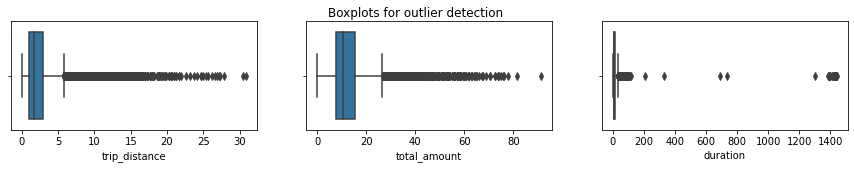

In [8]:
# Checking for outliers (needed mostly for the MLR model)
fig, axes = plt.subplots(1, 3, figsize=(15, 2))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0], x=df['trip_distance'])
sns.boxplot(ax=axes[1], x=df['total_amount'])
sns.boxplot(ax=axes[2], x=df['duration'])
plt.show();

##### trip_distance ranges from 0 -> 33 miles, total_amount 0 -> 91$, and duration from 0 -> 1500 mins.
 1500 mins is more than a day, we will need to evaluate these excessive numbers

In [9]:
# trip distance ranges from 0 -> 33 miles, total_amount 0 -> 91 $ , and duration from 0 -> 1500 mins.
# duration values are very big and need to be checked.
duration_outliers = df[df['duration'] > 120].reset_index(drop=True)
# duration_outliers.describe()
duration_outliers['hrs']=duration_outliers.duration/60
duration_outliers.sort_values(by=['duration'],ascending=False)[['trip_distance','total_amount','duration','hrs']].reset_index(drop=True)

,trip_distance,total_amount,duration,hrs
0,4.86,18.8,1439.550000,23.992500
1,0.74,8.8,1439.150000,23.985833
2,0.95,8.8,1438.850000,23.980833
3,1.73,10.3,1438.650000,23.977500
4,1.99,8.3,1438.550000,23.975833
5,1.09,8.3,1438.466667,23.974444
6,3.13,31.3,1438.266667,23.971111
7,2.93,19.3,1438.033333,23.967222
8,4.70,24.3,1436.966667,23.949444
9,1.93,16.3,1436.500000,23.941667


##### Values of duration column do not make sense and these results need to be communicated with the Taxi company.
##### In our case, since this is an imaginary scenario we will need to work with those values either by erasing them, re-assigning them to the interquantile range maximum limits, or try to normalize by using log,sqrt,...

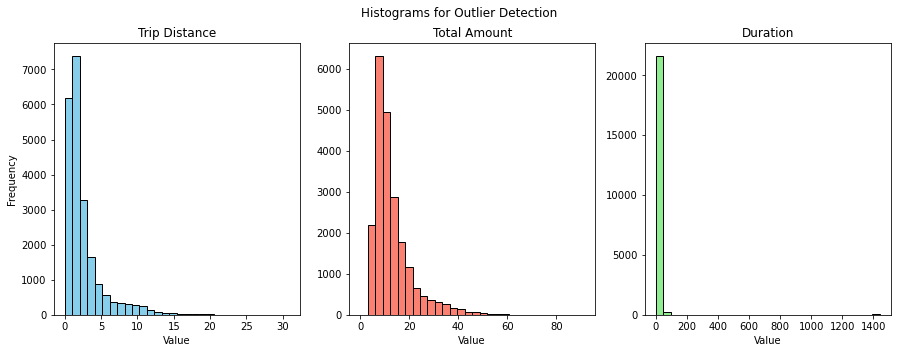

In [10]:
# Creating a figure and axes for subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Setting the overall title for the figure
fig.suptitle('Histograms for Outlier Detection')

# Creating histograms for trip distance, fare amount, and duration
axes[0].hist(df['trip_distance'], bins=30, color='skyblue', edgecolor='black')
axes[1].hist(df['total_amount'], bins=30, color='salmon', edgecolor='black')
axes[2].hist(df['duration'], bins=30, color='lightgreen', edgecolor='black')

# Setting titles for individual subplots
axes[0].set_title('Trip Distance')
axes[1].set_title('Total Amount')
axes[2].set_title('Duration')

# Setting labels for x-axis
for ax in axes:
    ax.set_xlabel('Value')

# Setting labels for y-axis
axes[0].set_ylabel('Frequency')

# Show the plot
plt.show()

#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [11]:
# Create 'day' col
df['day'] = df['tpep_pickup_datetime'].dt.day_name().str.lower()

# Create 'month' col
df['month'] = df['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

In [12]:
# Create 'rush_hour' col
df['rush_hour'] = df['tpep_pickup_datetime'].dt.hour

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df.loc[df['day'].isin(['saturday', 'sunday']), 'rush_hour'] = 0

In [13]:
def rush_hours(hour):
    if 6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else:
        val = 0
    return val

In [14]:
# Apply the `rush_hours()` function to the new column
df.loc[(df.day != 'saturday') & (df.day != 'sunday'), 'rush_hour'] = df.apply(rush_hours, axis=1)
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.5,2.76,0.0,0.3,13.8,14.066667,saturday,mar,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.5,4.00,0.0,0.3,16.8,26.500000,tuesday,apr,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.5,1.45,0.0,0.3,7.3,7.200000,friday,dec,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.5,6.39,0.0,0.3,21.3,30.250000,sunday,may,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.5,0.5,0.00,0.0,0.3,17.8,16.716667,saturday,apr,0


#### Delete unnecessary columns

In [15]:
# Eliminating unneccesary columns
df.describe()
df['payment_type'].sort_values().value_counts(normalize=True)
df.groupby(['payment_type']).mean()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,rush_hour
payment_type,,,,,,,,,,,,,,,,
1,5.663114e+07,1.555151,1.621399,2.660824,1.0,163.029819,162.305741,12.129866,0.329926,0.499899,2.485126,0.222615,0.299939,13.267584,15.371499,0.312150
2,5.701032e+07,1.565573,1.689252,2.335863,1.0,162.117481,160.704606,11.183829,0.305747,0.499789,0.000000,0.111359,0.299958,12.289322,17.842699,0.266094


##### 'payment_type' column has two unique values evenly distributed and can be neglected without causing a major disturbance to our ML model.
##### The tip amount is only included in credit card payments, in our case this is not important since we are trying to predict the fare amount, not the tip amount.

In [16]:
# Eliminating unneccesary columns
df['store_and_fwd_flag'].sort_values().value_counts(normalize=True)
df.groupby(['store_and_fwd_flag']).describe()
df.groupby(['store_and_fwd_flag']).mean()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,rush_hour
store_and_fwd_flag,,,,,,,,,,,,,,,,,
N,5.678244e+07,1.560931,1.645135,2.553531,1.0,162.737585,161.849872,1.323484,11.815718,0.322132,0.499863,1.67995,0.186091,0.299945,12.943059,16.173516,0.297187
Y,5.013372e+07,1.000000,1.234043,3.034043,1.0,161.989362,147.244681,1.404255,13.632979,0.313830,0.500000,1.77734,0.301702,0.300000,14.746809,15.761170,0.308511


##### 'store_and_fwd_flag' column also does not have major difference between both groups.

##### same concept for 'VendorID' & 'passenger_count'

In [17]:
# Eliminating unneccesary columns
df.groupby('VendorID').describe()[['duration','total_amount']]
# df.groupby('VendorID').mean(numeric_only=False)
# df['VendorID'].value_counts(normalize=True)

duration                                                       \
            count       mean        std       min       25%        50%   
VendorID                                                                 
1          9678.0  13.703625  10.105658  0.000000  6.683333  11.150000   
2         12244.0  18.122621  80.563406  0.016667  6.566667  10.866667   

                                 total_amount                                 \
                75%          max        count       mean       std  min  25%   
VendorID                                                                       
1         17.883333   105.383333       9678.0  13.005776  8.353705  3.3  7.8   
2         17.583333  1439.550000      12244.0  12.907334  8.334634  0.0  7.8   

                            
           50%   75%   max  
VendorID                    
1         10.3  15.3  91.3  
2         10.3  15.3  81.3

In [18]:
df.groupby('passenger_count').mean(numeric_only=True)
df['passenger_count'].value_counts(normalize=True)

1    0.710975
2    0.144102
5    0.050953
3    0.041921
6    0.030654
4    0.019934
0    0.001460
Name: passenger_count, dtype: float64

In [19]:
df2=df.copy()

In [20]:
df2 = df2.drop(['Unnamed: 0', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'fare_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'day', 'month','passenger_count','VendorID'
               ], axis=1)
df2

,trip_distance,total_amount,duration,rush_hour
0,3.34,13.8,14.066667,0
1,1.80,16.8,26.500000,0
2,1.00,7.3,7.200000,1
3,3.70,21.3,30.250000,0
4,4.37,17.8,16.716667,0
...,...,...,...,...
21917,0.89,8.8,9.450000,0
21918,0.61,5.8,3.266667,1
21919,0.42,5.3,4.133333,0
21920,2.36,11.3,11.933333,0


### Draw scatterplot to visualize the relationship between mean_duration and total_amount

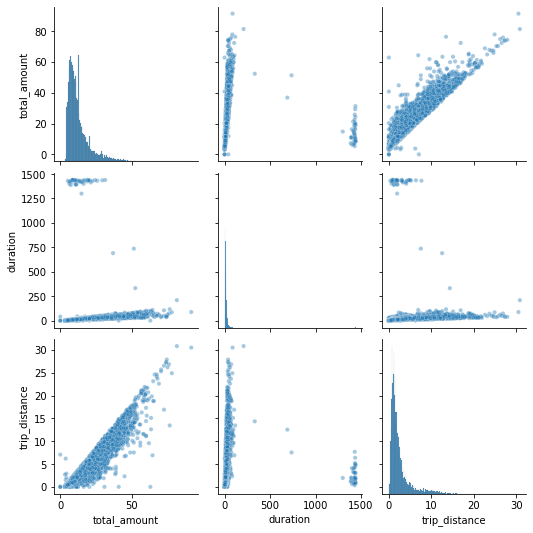

In [21]:
# Create a pairplot to visualize pairwise relationships between variables in the data
### YOUR CODE HERE ###

sns.pairplot(df2[['total_amount', 'duration', 'trip_distance']],
             plot_kws={'alpha':0.4, 'size':5},
             );

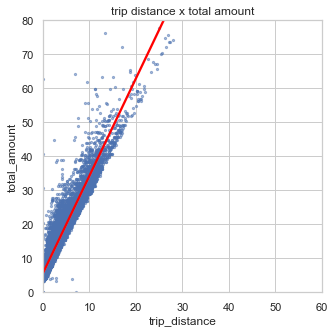

In [22]:
# Create a scatter plot of duration and trip_distance, with a line of best fit
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.regplot(x=df2['trip_distance'], y=df2['total_amount'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})
plt.ylim(0, 80)
plt.xlim(0, 60)
plt.title('trip distance x total amount')
plt.show()

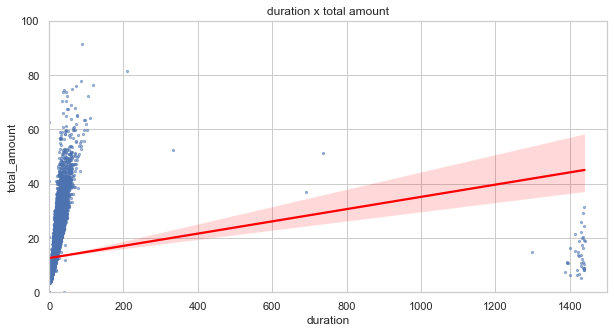

In [23]:
# Create a scatter plot of duration and trip_distance, with a line of best fit
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
sns.regplot(x=df2['duration'], y=df2['total_amount'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})
plt.ylim(0, 100)
plt.xlim(0,1500)
plt.title('duration x total amount')
plt.show()

In [24]:
df[df['duration'] > 200][['duration', 'PULocationID', 'DOLocationID','total_amount', 'trip_distance']].sort_values(by='duration', ascending=False).head(50)


,duration,PULocationID,DOLocationID,total_amount,trip_distance
885,1439.550000,249,238,18.8,4.86
15012,1439.150000,161,162,8.8,0.74
14458,1438.850000,162,161,8.8,0.95
21864,1438.650000,107,249,10.3,1.73
14613,1438.550000,239,166,8.3,1.99
7656,1438.466667,48,161,8.3,1.09
20637,1438.266667,236,186,31.3,3.13
6509,1438.033333,107,141,19.3,2.93
17995,1436.966667,211,142,24.3,4.70
20688,1436.500000,249,148,16.3,1.93


### Fixing some problems in the mean_duration:

Too many outliers we need to normalize the mean duration or impute the outliers.

In [25]:
###### Solution Problem 2 outliers
# Compute the square root
# square_root = math.sqrt(number)
df2['sqr_duration'] = np.sqrt(df2['duration'])
df2['sqr_total_amount'] = np.sqrt(df2['total_amount'])
df2['sqr_trip_distance'] = np.sqrt(df2['trip_distance'])

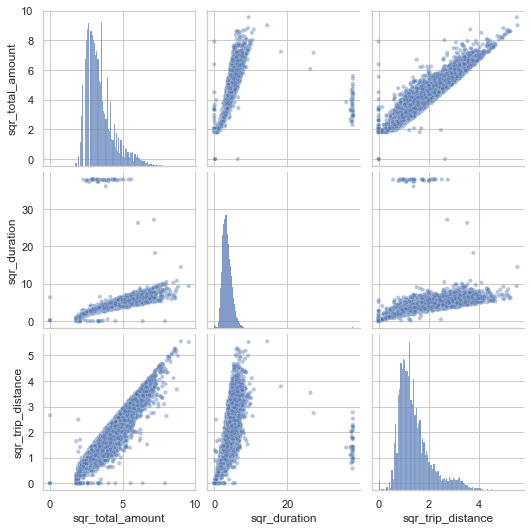

In [26]:
# Create a pairplot to visualize pairwise relationships between variables in the data
### YOUR CODE HERE ###

sns.pairplot(df2[['sqr_total_amount', 'sqr_duration', 'sqr_trip_distance']],
             plot_kws={'alpha':0.4, 'size':5},
             );

In [27]:
###### Solution Problem 2 outliers
# Compute the square root
# square_root = math.sqrt(number)
df2['log_duration'] = np.log(df2['duration'])
df2['log_total_amount'] = np.log(df2['total_amount'])
df2['log_trip_distance'] = np.log(df2['trip_distance'])
df2.describe()

C:\Users\yorgh\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\yorgh\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\yorgh\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,trip_distance,total_amount,duration,rush_hour,sqr_duration,sqr_total_amount,sqr_trip_distance,log_duration,log_total_amount,log_trip_distance
count,21922.000000,21922.000000,21922.000000,21922.000000,21922.000000,21922.000000,21922.000000,2.192200e+04,2.192200e+04,2.192200e+04
mean,2.555592,12.950794,16.171748,0.297236,3.532058,3.458866,1.444132,-inf,-inf,-inf
std,2.763908,8.343011,60.620599,0.457052,1.922623,0.993523,0.685635,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-inf,-inf,-inf
25%,0.980000,7.800000,6.633333,0.000000,2.575526,2.792848,0.989949,1.892107e+00,2.054124e+00,-2.020271e-02
50%,1.600000,10.300000,11.000000,0.000000,3.316625,3.209361,1.264911,2.397895e+00,2.332144e+00,4.700036e-01
75%,2.900000,15.300000,17.716667,1.000000,4.209117,3.911521,1.702939,2.874506e+00,2.727853e+00,1.064711e+00
max,30.830000,91.300000,1439.550000,1.000000,37.941402,9.555103,5.552477,7.272086e+00,4.514151e+00,3.428488e+00


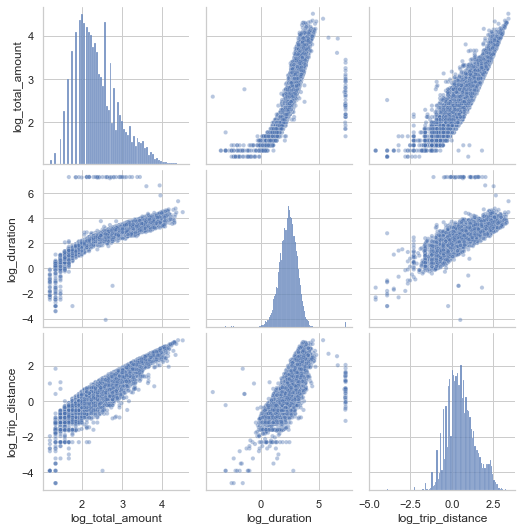

In [28]:
# Create a pairplot to visualize pairwise relationships between variables in the data
### YOUR CODE HERE ###

sns.pairplot(df2[['log_total_amount', 'log_duration', 'log_trip_distance']],
             plot_kws={'alpha':0.4, 'size':5},
             );

C:\Users\yorgh\anaconda3\lib\site-packages\numpy\core\function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
C:\Users\yorgh\anaconda3\lib\site-packages\numpy\core\function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
C:\Users\yorgh\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


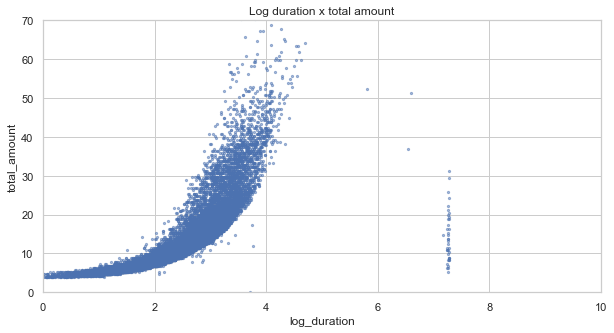

In [29]:
# Create a scatter plot of duration and trip_distance, with a line of best fit
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
sns.regplot(x=df2['log_duration'], y=df2['total_amount'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})
plt.ylim(0, 70)
plt.xlim(0,10)
plt.title('Log duration x total amount')
plt.show()

In [30]:
#### Problem 2 Outliers:

def outlier_imputer(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in column_list:
        # Reassign minimum to zero
        df2.loc[df2[col] < 0, col] = 0

        # Calculate upper threshold
        q1 = df2[col].quantile(0.25)
        q3 = df2[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        # Reassign values > threshold to threshold
        df2.loc[df2[col] > upper_threshold, col] = upper_threshold
        print(df2[col].describe())
        print()
outlier_imputer(['duration'], 2)

duration
q3: 17.716666666666665
upper_threshold: 39.883333333333326
count    21922.000000
mean        13.361738
std          9.078921
min          0.000000
25%          6.633333
50%         11.000000
75%         17.716667
max         39.883333
Name: duration, dtype: float64



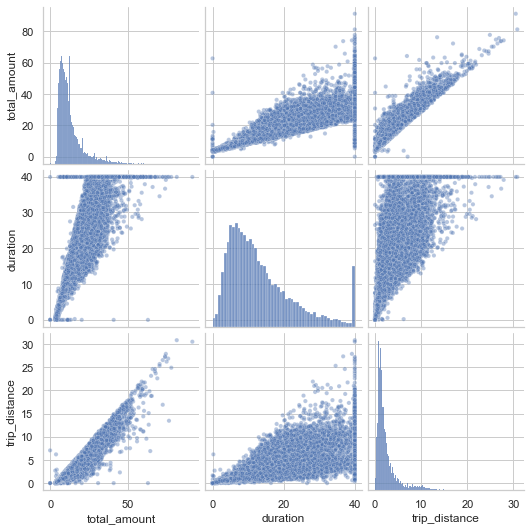

In [31]:
# Create a pairplot to visualize pairwise relationships between variables in the data
### YOUR CODE HERE ###

sns.pairplot(df2[['total_amount', 'duration', 'trip_distance']],
             plot_kws={'alpha':0.4, 'size':5},
             );

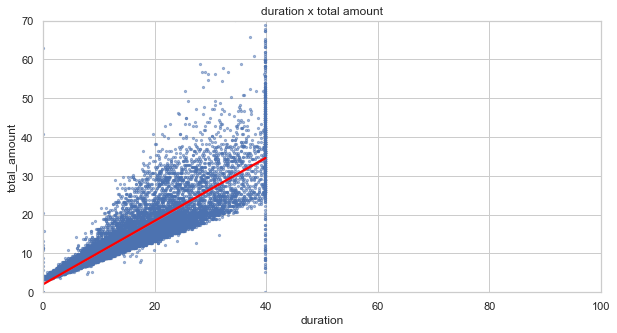

In [32]:
# Create a scatter plot of duration and trip_distance, with a line of best fit
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
sns.regplot(x=df2['duration'], y=df2['total_amount'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})
plt.ylim(0, 70)
plt.xlim(0,100)
plt.title('duration x total amount')
plt.show()

In [33]:
df3=df2.copy()
df3=df3[['trip_distance','duration','total_amount','rush_hour']]

In [34]:
df3.to_csv(r"C:\Users\yorgh\Documents\Course Materials\Google Advanced Data Analytics Course\Datasets Exercise\Automatidata project\2017_Yellow_Taxi_Trip_Features_engineering(2).csv", index=False)

### End